<a href="https://colab.research.google.com/github/mrityunjai-73/gripjune-task1/blob/main/GRIPJUNE23_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDICT THE PERCENTAGE OF STUDENT BASED ON THE NO. OF STUDY HOURS


IMPORTING THE LIBRARIES

In [4]:
import numpy as np
import pandas as pd

IMPORTING DATA

In [5]:
data = pd.read_csv('/content/student_scores.-.student_scores.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [11]:
data.shape

(25, 2)

In [12]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

HANDLING MISSING VALUES

In [14]:
data1=data.fillna(data.mean())

VISUALISING THE DATASET

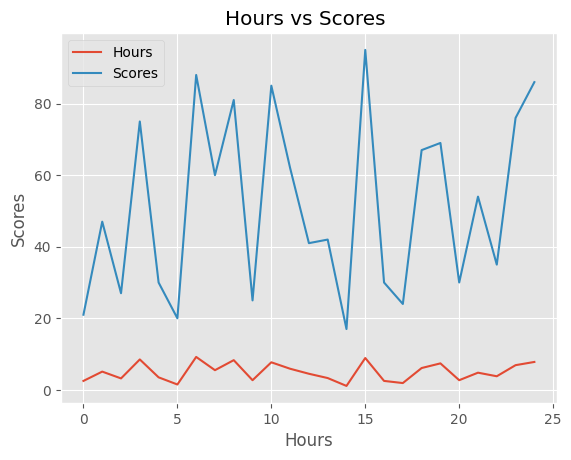

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data.plot(kind= 'line')
plt.title('Hours vs Scores ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

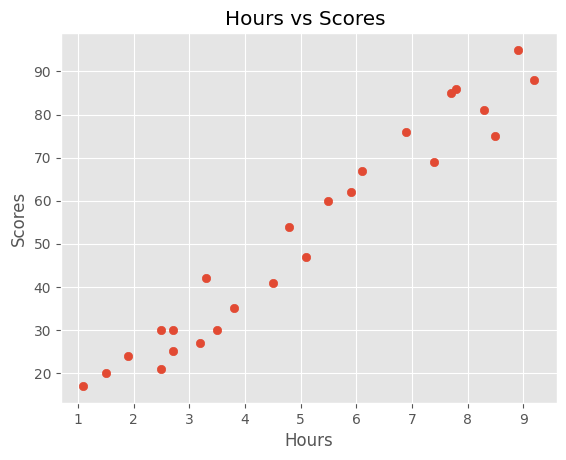

In [16]:
plt.scatter(x=data.Hours,y=data.Scores)
plt.title('Hours vs Scores ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

FROM THIS WE CAN CLEARLY SEE THAT THERE IS A LINEAR RELATIONSHIP BETWEEN HOURS AND SCORES

SPLIT THE DATASET INTO TRAIN AND TEST DATASET

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

APPLYING LINEAR REGRESSION MODEL

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

VISUALISING THE REGRESSION LINE

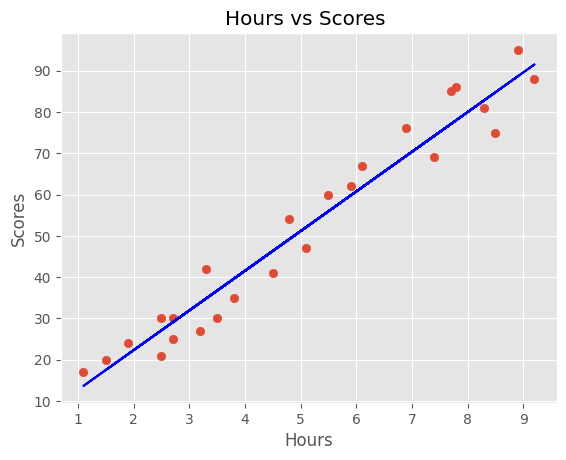

In [19]:
line = model.coef_ * X + model.intercept_
plt.scatter(X,y)
plt.plot(X,line, color='blue')
plt.title('Hours vs Scores ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 37.563452579516046
R-squared Score: 0.9000546706590143


VISUALIZING THE TRAIN DATASET

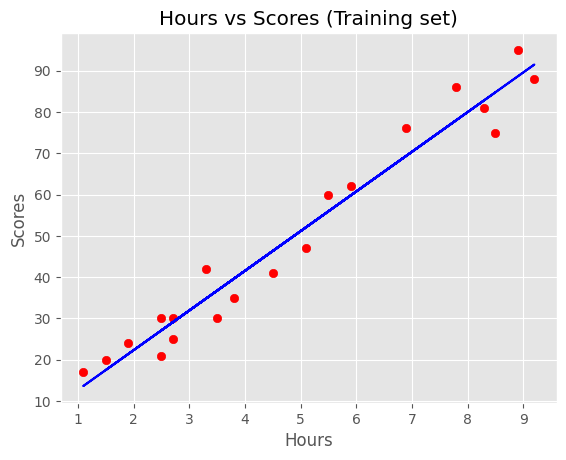

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


VISUALIZING THE TEST DATASET

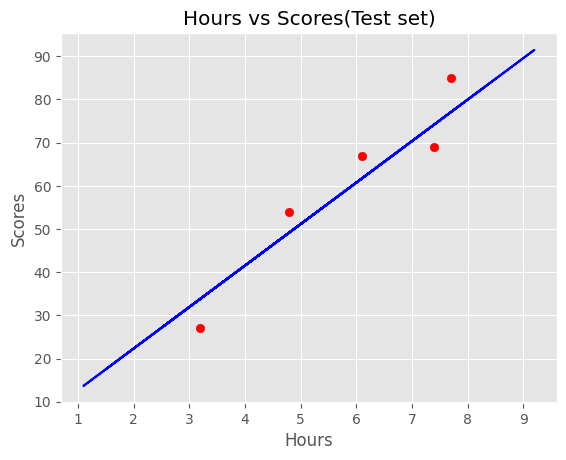

In [22]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Hours vs Scores(Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

PREDICTING THE RESULT

In [23]:
y_pred = model.predict(X_test)

In [24]:
# y_test and y_pred are the actual and predicted values, respectively

y_test = np.array(y_test).ravel()       #to convert in 1-D array
y_pred = np.array(y_pred).ravel()       #to convert in 1-D array
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)


   Actual  Predicted
0      69  74.174939
1      67  61.688457
2      27  33.833997
3      85  77.056435
4      54  49.201975


In [25]:
study_hours = 9.25
predicted_percentage = min(model.predict([[study_hours]]), 100)
print("Predicted Percentage for", study_hours, "study hours:", predicted_percentage)

Predicted Percentage for 9.25 study hours: [91.94416405]


REGRESSION COEFICIENT AND INTERCEPT

In [26]:
print(model.coef_)
print(model.intercept_)

[9.60498629]
3.0980408893375326


Therefore, the equation of our simple linear regression model is:

Scores = 9.60498629 × hours + 3.09804089